# 1. Tasks:  
- Load the dataset (we are using sklearn for this process)
- Explore the dataset (we are using pandas for this process)

In [33]:
from sklearn import datasets
import pandas
import seaborn

We will load the dataset using sklearn's dataset module that is included in the package. This gives us the dataset as a dictionary with the following keys:

In [34]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The keys of interests are:
- data = this contains the 4 features  and 150 instances. So it's 2D array of shape (150, 4) 
- feature_names = array of the feature names of shape (1, 4)
- target = array of species index of shape (150, 1)
- target_names = array of species' name of shape (1, 3). The 3 here indicates that there are 3 values in this array i.e. three species ("Setosa", "Versicolor" or "Virginica")

**Features** are the length and width of the flower's sepal and petal and **target** is the name of the species in numeric value. Example row: (5.1, 3.5, 1.4, 0.2, 0) where the ending zero indicate "Setosa". This can be found by opening the zeroth value of **target_names**

For data analysis, we will convert the iris data to a pandas dataframe by providing the data and the column names. In addition, we will add a column named 'species' and map the species name from the target column. We did this so that we can see the names in text form instead of numbers.

In [36]:
df = pandas.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]

Now lets see the dataframe. We have 150 rows and 5 columns.

In [37]:
df # first 5 and last 5
# df.head(5) # first 5 rows
# df.tail(5) # last 5 rows 
df.iloc[5:10] # access any row indices

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# 2. Tasks for descriptive analysis:
- simple statistics
- visualization
- clustering

Now let us get some basic statistics of the dataframe. We will the `df.describe()` to output the count, mean, standard deviation, minimum, maximum and the first 3 quartiles of the numerical columns.

In [38]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


But maybe we would like to see the statistics within the species. For that we will group the data by the species column and aggregate the values in other columns.

In [39]:
df.groupby('species').agg(['count','mean','std'])

sepal length (cm)                  sepal width (cm)         \
                       count   mean       std            count   mean   
species                                                                 
setosa                    50  5.006  0.352490               50  3.428   
versicolor                50  5.936  0.516171               50  2.770   
virginica                 50  6.588  0.635880               50  2.974   

                     petal length (cm)                  petal width (cm)  \
                 std             count   mean       std            count   
species                                                                    
setosa      0.379064                50  1.462  0.173664               50   
versicolor  0.313798                50  4.260  0.469911               50   
virginica   0.322497                50  5.552  0.551895               50   

                             
             mean       std  
species                      
setosa      0.246  0.105386  
versicolor  1.326  0.197753  
virginica   2.026  0.274650

How about a chart? Let's use `seaborn` package and create a pair plot to see scatter plots for all pairs of the features. We provide the data and specify which column contain the category data.

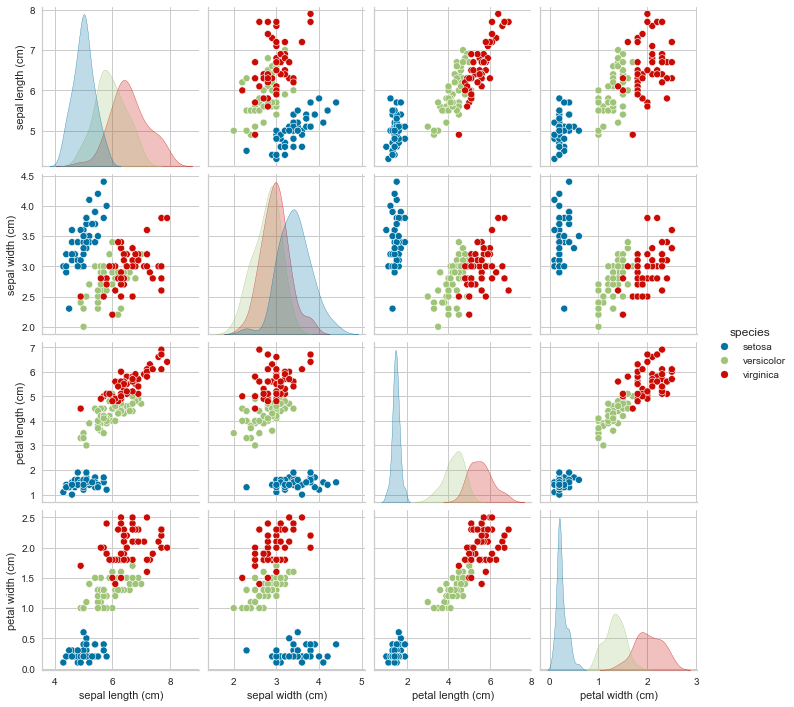

In [40]:
seaborn.pairplot(data = df, hue='species')

From the above plots we can see the difference and similaries among them. To make sure that are actually 3 species and not 2 or 1 species, we want to do cluster analyiss that can a comprehensive information based on some metric. For example, there could be 2 clusters or 10 clusters. For that we will use *k-means* clustering and using *elbow plots* to determine the optimal number of clusters. The elbow plot show a clustering metric in y axis against the number of clusters (usually the corner of the elbow plot gives the number of cluster present). As powerful as they are, they are still tools and they can be wrong. For example, we create two elbow plots: 
1. the distortion against the number clusters ($k$) in the first plot. The package is suggesting that there are 4 clusters but this is counter-intuitive. So we use another metric and create a new elbow plot
2. Calinski-Harabasz score, a ratio of sum of between-cluster and within-cluster dispersion ([sklearn reference](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html)).


In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

X, y = iris.data, iris.target

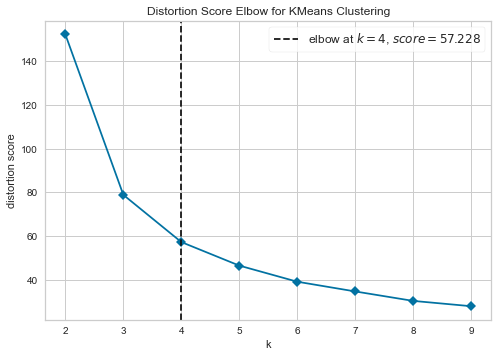

In [42]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

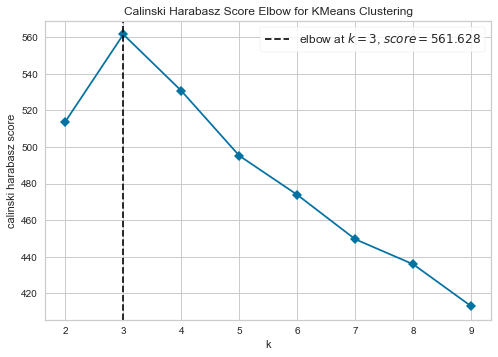

In [43]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

# 3. Task for predictive analysis
- prepare dataset
- prepare and train model
- evaluate model

In [44]:
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix


Lets store our features and target data in $X$ and $y$ variables. We are using the convention to denote features with uppercase letters and target values with lowercase letters. The variable naming choices are followed from scikit-learn's documentation.

In [45]:
X, y = iris.data, iris.target

But we should not use all 150 instances to train our model because we want to test it on unknown instances. In addition, we do not want to **overfit** our model to the training data set but still learn a generalized solution so that it can classify instances that it has never seen before. So we will split the $X$ and $y$ while also keeping the class count same i.e. stratify. We also have to keep in mind that some models may be data hungry and fewer traning data may **underfit** the model. 

*Note*: `random_state` paramater is used to get the same random output every time. You will find similar parameters in many functions that use random generators.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, stratify=y, random_state=2)

Now we define our classifier as a pipeline that will first standardize our features and train a classifier. We can try out other classifier by toggling the commented out lines. We have linear support vector classifier (LinearSVC), a neural network or multi layer perceptron with 2 hidden layers (MLPClassifier), decision tree classifier and random forest classifer. For now we did put any parameters for decision tree and random forest. Finally, we will use `yellowbricks` to help us visualize our classifier performance using a **confusion matrix**. Changing/tuning of these paramaters to get the optimal solution is also known as **hyperparameter tuning/optimization**. For example, in the MLPClassifier, I have tuned the `alpha` (learning rate), `hidden_layer_sizes` and `max_iter` (limit training iteration in case it takes longer to convergence).

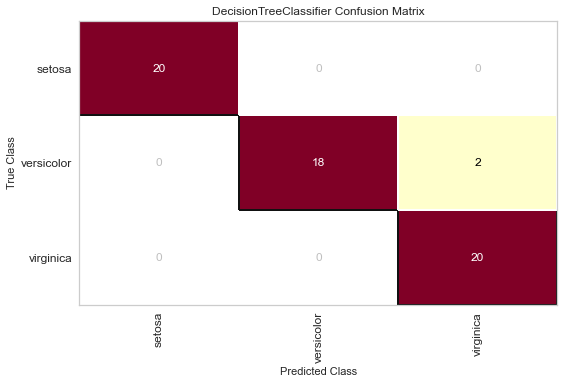

In [58]:
clf = make_pipeline(
    StandardScaler(), 
    # LinearSVC(random_state=0, tol=1e-5),
    # MLPClassifier(alpha=1e-3, hidden_layer_sizes=(5, 4), random_state=1, max_iter=1000),
    DecisionTreeClassifier(),
    # RandomForestClassifier()
)

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf, classes=iris.target_names)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show();

Now that we are sure with model, we can train the classifier and use it for prediction of unknown instances. For example, we want to predict the species from the first 5 test instances.

In [66]:
model = clf.fit(X_train, y_train)

predicted_target = model.predict(X_test[:5])

print('predicted:', predicted_target)
print('ground truth', y_test[:5])
print('predicted:', [iris.target_names[i] for i in predicted_target])
print('ground truth:', [iris.target_names[i] for i in y_test[:5]])

predicted: [1 0 0 0 1]
ground truth [1 0 0 0 1]
predicted: ['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor']
ground truth: ['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor']
